In [1]:
# using plaidml to connect to my eGPU
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID644red_train.csv')
test = pd.read_csv('AID644red_test.csv')
test.head(5)

,NEG_04_POS,NEG_07_HBA,NEG_02_ARC,NEG_03_ARC,NEG_07_ARC,POS_04_POS,POS_04_HBD,POS_05_HBD,POS_07_HBD,POS_04_HBA,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,1,0,0,0,0,...,3.79720,3.314,70.17,3,3,0,310.361,0,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,3.94562,3.342,68.12,0,2,0,268.272,1,0,Active
2,0,0,0,0,0,0,0,0,0,0,...,3.75156,3.103,155.34,10,4,2,464.576,0,0,Active
3,0,0,0,0,0,0,0,0,0,0,...,3.74092,3.122,121.95,5,3,1,300.278,0,0,Active
4,0,0,0,0,0,0,0,0,0,0,...,3.77651,3.150,57.70,5,1,0,219.292,1,0,Active


In [3]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [4]:
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)
test.head()

,NEG_04_POS,NEG_07_HBA,NEG_02_ARC,NEG_03_ARC,NEG_07_ARC,POS_04_POS,POS_04_HBD,POS_05_HBD,POS_07_HBD,POS_04_HBA,...,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome,label
0,0,0,0,0,0,1,0,0,0,0,...,3.314,70.17,3,3,0,310.361,0,0,Active,1
1,0,0,0,0,0,0,0,0,0,0,...,3.342,68.12,0,2,0,268.272,1,0,Active,1
2,0,0,0,0,0,0,0,0,0,0,...,3.103,155.34,10,4,2,464.576,0,0,Active,1
3,0,0,0,0,0,0,0,0,0,0,...,3.122,121.95,5,3,1,300.278,0,0,Active,1
4,0,0,0,0,0,0,0,0,0,0,...,3.150,57.70,5,1,0,219.292,1,0,Active,1


In [5]:
# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

In [6]:
# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


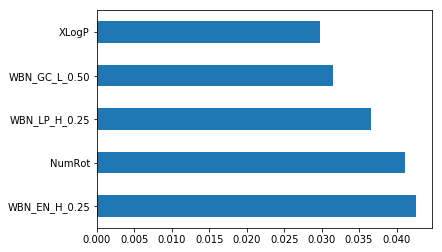

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# Select best features for the label
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [8]:
# Create dataframe with olny the best features
x_train = x_train[['XLogP', 'WBN_GC_L_0.50', 'WBN_LP_H_0.25', 'NumRot', 'WBN_EN_H_0.25']]

x_test = x_test[['XLogP', 'WBN_GC_L_0.50', 'WBN_LP_H_0.25', 'NumRot', 'WBN_EN_H_0.25']]

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.nadam(lr=.0001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128)

Epoch 1/10
165/165 [==============================] - 0s 176us/step - loss: 0.6320 - acc: 0.6606
Epoch 2/10
165/165 [==============================] - 0s 161us/step - loss: 0.6234 - acc: 0.6667
Epoch 3/10
165/165 [==============================] - 0s 121us/step - loss: 0.6299 - acc: 0.6727
Epoch 4/10
165/165 [==============================] - 0s 109us/step - loss: 0.6355 - acc: 0.6667
Epoch 5/10
165/165 [==============================] - 0s 114us/step - loss: 0.6162 - acc: 0.6667
Epoch 6/10
165/165 [==============================] - 0s 96us/step - loss: 0.6377 - acc: 0.6606
Epoch 7/10
165/165 [==============================] - 0s 96us/step - loss: 0.6209 - acc: 0.6606
Epoch 8/10
165/165 [==============================] - 0s 93us/step - loss: 0.6313 - acc: 0.6727
Epoch 9/10
165/165 [==============================] - 0s 95us/step - loss: 0.6258 - acc: 0.6788
Epoch 10/10
165/165 [==============================] - 0s 89us/step - loss: 0.6286 - acc: 0.6727


In [19]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Score', score)

41/41 [==============================] - 0s 3ms/step
Score [0.6387706398963928, 0.6829267740249634]
